In [19]:
%matplotlib inline
import os
import sys
from matplotlib import *
from pylab import *

In [20]:
def get_underscore_locations(file):
    underscore_locations = [index for index, character in enumerate(file)
                            if character == "_"]
    return underscore_locations

def get_file_contents(file_name):
    file_path = os.path.join(path, file_name)
    with open(file_path, "r") as file:
        file.readline()
        file_contents = file.readlines()
    return file_contents

def get_detuning_and_gamma(file_contents, dataset):
    file_lines_decomposed = [[float(number) for number in line.strip().split('\t')]
                             for line in file_contents]
    output_outliers(file_lines_decomposed, dataset)
    file_lines_decomposed = [i for i in file_lines_decomposed if abs(i[1]) < 200]
    detuning, gamma = zip(*file_lines_decomposed)
    return detuning, gamma

def output_outliers(file_lines_decomposed, dataset):
    for i in file_lines_decomposed:
        if abs(i[1]) >= 200:
            print((f"Detuning: {i[0]}\n"
                   f"Gamma: {i[1]}\n"
                   f"Dataset: {dataset}\n"))

In [21]:
def plot_detuning_vs_gamma(path):
    for file_name in sorted(os.listdir(path)):
        file_contents = get_file_contents(file_name)
        data_set = file_name[18:]
        detuning, gamma = get_detuning_and_gamma(file_contents, data_set)
        plt.plot(detuning, gamma, label = data_set)
    return plt

def add_plot_labels(plt):
    plt.legend(loc="upper right")
    plt.xlabel("My x label")
    plt.ylabel("My y label")
    plt.title("My title")
    return plt

Detuning: 0.0
Gamma: 228.59155952359734
Dataset: 15112022_26_dBm

[[8000000.0, 58.87761233410223], [7000000.0, 49.75624729510306], [6000000.0, 64.52217785684343], [5000000.0, 103.74602092645424], [4000000.0, 85.41940934133565], [3000000.0, 173.90725078052162], [2000000.0, 188.36412364480194], [1000000.0, 161.41849133180727], [0.0, 228.59155952359734], [-1000000.0, 169.15436853645588], [-2000000.0, 157.96483130490876], [-3000000.0, 95.24736262856008], [-4000000.0, 80.2605248522516], [-5000000.0, 58.91232215217732], [-6000000.0, 98.72278031810286], [-7000000.0, 125.46315919344947], [-8000000.0, 113.58957600675289], [-9000000.0, 135.48792371768184], [-10000000.0, 109.31668770373197], [-11000000.0, 106.43473305939952], [-12000000.0, 74.3526114989008], [-13000000.0, 58.7990030595546], [-14000000.0, 52.49513130256824], [-15000000.0, 48.14641908126588]]
[[0.0, 32.23388139583049], [-1000000.0, 46.66031588367248], [-2000000.0, 64.92011240945828], [-3000000.0, 80.91620224311825], [-4000000.0, 81

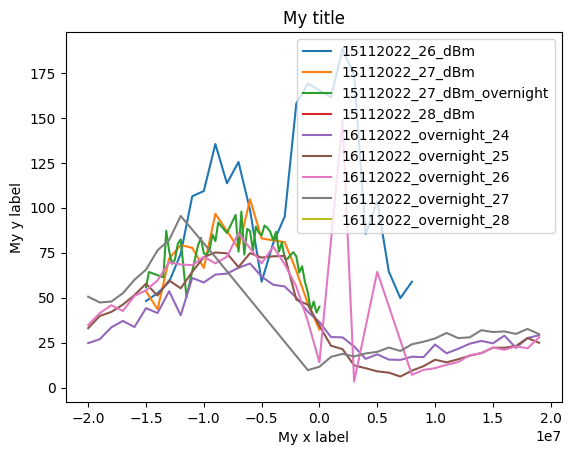

In [22]:
parent_folder = os.path.dirname(sys.path[0])
path = os.path.join(parent_folder, "Gamma Results")
plt = plot_detuning_vs_gamma(path)
plt = add_plot_labels(plt)